In [1]:
'''
WARNING
If you use google colab then run this cell and choose caps_net.py
file to upload to the colab server
otherwise ignore this cell!!!
'''
!pip install tqdm
from google.colab import files
src = list(files.upload().values())[0]
open('caps_net.py','wb').write(src)

Saving caps_net.py to caps_net.py


10220

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from caps_net import CapsNet
from tqdm import tqdm
import time
from sklearn.metrics import confusion_matrix
import itertools

C:\Users\16678039\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


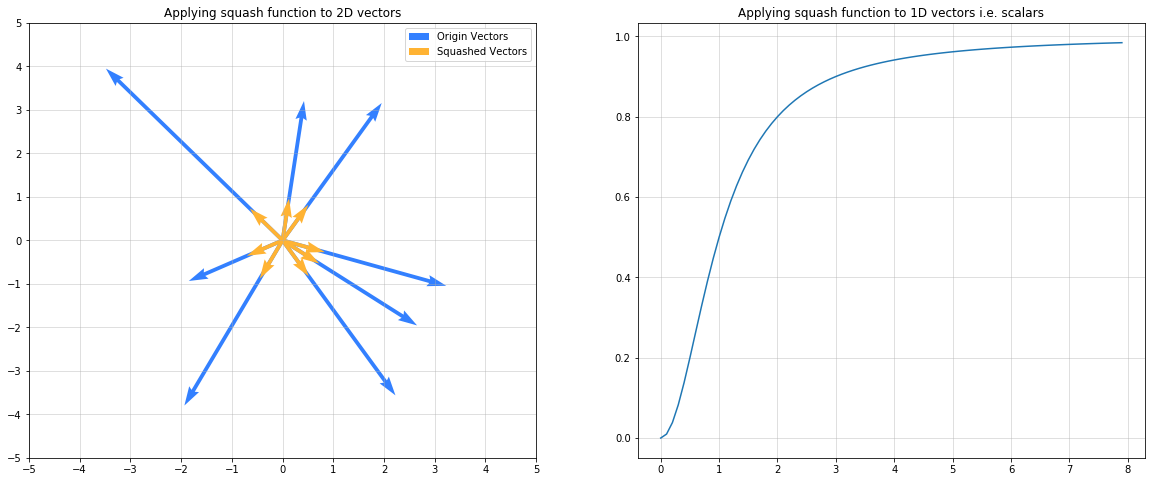

In [0]:
def squash_scalar(x):
    return x**2/(1+x**2)

def squash_vec(x):
    norm = np.linalg.norm(x)
    sq_norm = norm**2
    return sq_norm/(1.0+sq_norm)*x/norm

fig = plt.figure(figsize=(20,8))

x = np.arange(0, 8, 0.1)
y = np.array([squash_scalar(x_i) for x_i in x])

fig.add_subplot(1,2,2)
plt.plot(x, y)
plt.grid(alpha=0.5)
plt.title('Applying squash function to 1D vectors i.e. scalars')

x, y = [0], [0]
u = np.random.rand(8)*10 - 5
v = np.random.rand(8)*10 - 5
sq_vecs = np.array([squash_vec(np.array([x1, x2])) for (x1, x2) in zip(u, v)])
sq_vecs = np.transpose(sq_vecs)

fig.add_subplot(1,2,1)
plt.quiver(x, y, u, v, color =(0.2, 0.5, 1, 1), scale=1, units='xy')
plt.quiver(x, y, sq_vecs[0], sq_vecs[1], color =(1, 0.7, 0.2, 1), scale=1, units='xy')
plt.legend(['Origin Vectors', 'Squashed Vectors'], loc='upper right')
plt.title('Applying squash function to 2D vectors')
ticks = range(-5, 6)
plt.xticks(ticks)
plt.yticks(ticks)
plt.grid(alpha=0.5)

plt.show()

In [2]:
def next_batch(size, x, y):
    idx = np.arange(0 , len(x))
    np.random.shuffle(idx)
    idx = idx[:size]
    data_shuffle = [x[i] for i in idx]
    labels_shuffle = [y[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [3]:
mnist = tf.keras.datasets.mnist
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

In [4]:
tf.reset_default_graph()

INPUT_DIM = (28, 28, 1)
CLASSES = 10
LEARNING_RATE = 0.01

caps_net = CapsNet(INPUT_DIM, CLASSES,
                   decoder_layers=(512, 1024))

optimizer = tf.train.AdamOptimizer(LEARNING_RATE)
training_op = optimizer.minimize(caps_net.loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

C:\Users\16678039\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [5]:
IMAGES_TO_SHOW = 5
def show_decoded_img(img_data, num_imgs):
    f, axes = plt.subplots(1, num_imgs, figsize=(15,4))
    f.suptitle('Origin images from testing set')
    for (i, ax) in enumerate(axes):
        ax.imshow(mnist_x_test[i], cmap='gray')
        ax.set_title('Label: ' + str(mnist_y_test[i]))
    for (i, img) in enumerate(img_data):
        f, axes = plt.subplots(1, num_imgs, figsize=(15,4))
        f.suptitle('Generated images from caps net decoder, epoch ' + str(i))
        for (i, ax) in enumerate(axes):
            ax.imshow(img[i], cmap='gray')
            ax.set_title('Label: ' + str(mnist_y_test[i]))
            
def get_decoded_data():
    mnist_x_batch_show = np.reshape(mnist_x_test[:IMAGES_TO_SHOW], (IMAGES_TO_SHOW, 28, 28, 1))
    decoded_imgs = sess.run(caps_net.decoded, feed_dict={caps_net.X: mnist_x_batch_show,
                                                         caps_net.Y: mnist_y_test[:IMAGES_TO_SHOW]})
    return np.reshape(decoded_imgs, (IMAGES_TO_SHOW, 28, 28))

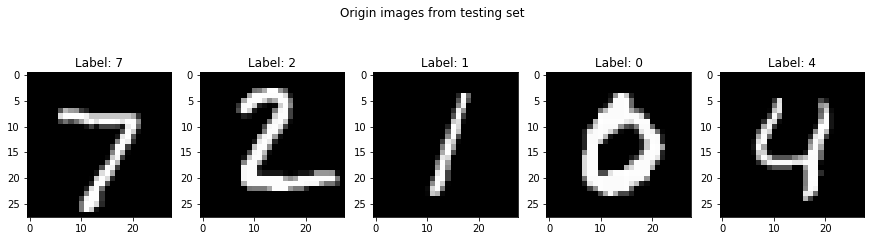

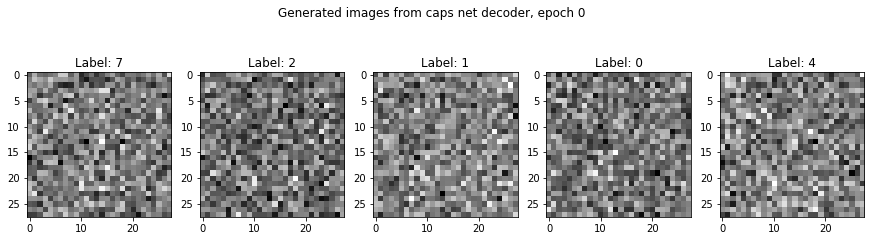

In [6]:
decoded_imgs = get_decoded_data()
show_decoded_img([decoded_imgs], IMAGES_TO_SHOW)

In [7]:
BATCH_SIZE = 1
mnist_x_batch, mnist_y_batch = next_batch(BATCH_SIZE, mnist_x_train, mnist_y_train)
mnist_x_batch = np.reshape(mnist_x_batch, (BATCH_SIZE, 28, 28, 1))
feed_dict_train = {
    caps_net.X: mnist_x_batch,
    caps_net.Y: mnist_y_batch
}
# print(sess.run(caps_net.digit_layer_out, feed_dict=feed_dict_train)[0][0])
# self.l2_norm_digit_caps_out
print(sess.run(caps_net.T, feed_dict=feed_dict_train))
print(sess.run(caps_net.digit_layer_out, feed_dict=feed_dict_train))
print(sess.run(caps_net.logit, feed_dict=feed_dict_train))
print(sess.run(caps_net.max_l, feed_dict=feed_dict_train))
print(sess.run(caps_net.max_r, feed_dict=feed_dict_train))
print(sess.run(caps_net.L, feed_dict=feed_dict_train))
print(sess.run(caps_net.ML, feed_dict=feed_dict_train))
print(sess.run(caps_net.mask, feed_dict=feed_dict_train))
print(sess.run(caps_net.out, feed_dict=feed_dict_train))
print(sess.run(caps_net.fc_input, feed_dict=feed_dict_train))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[[[ 0.22930609]
   [-0.2962352 ]
   [-0.21526304]
   [-0.14478785]
   [ 0.05133272]
   [-0.01500697]
   [ 0.04491128]
   [ 0.06107713]
   [ 0.02790487]
   [-0.5684134 ]
   [-0.04450194]
   [-0.22412857]
   [ 0.47734475]
   [-0.18428846]
   [-0.06306837]
   [ 0.15282613]]

  [[-0.39967468]
   [-0.6294819 ]
   [ 0.05675794]
   [-0.19085771]
   [-0.04968441]
   [ 0.01253479]
   [ 0.12251859]
   [-0.1718364 ]
   [ 0.08737681]
   [ 0.12781776]
   [-0.14533286]
   [ 0.0921596 ]
   [ 0.0686565 ]
   [ 0.29273543]
   [-0.24601182]
   [ 0.1998656 ]]

  [[-0.01187612]
   [ 0.3115669 ]
   [-0.20825483]
   [ 0.09104716]
   [ 0.10271676]
   [ 0.5108029 ]
   [ 0.04778175]
   [ 0.16006902]
   [ 0.06606214]
   [-0.40597734]
   [-0.36443028]
   [ 0.19668813]
   [ 0.14612845]
   [-0.00088013]
   [-0.27517316]
   [ 0.07852617]]

  [[ 0.36869928]
   [-0.02131264]
   [-0.0588917 ]
   [-0.34458503]
   [ 0.06547008]
   [-0.13768132]
   [ 0.18415064]
   [ 0.31263474]
   [ 0.0

In [8]:
'''
Training on mnist data
'''
mnist_x_train = mnist_x_train[:100]
mnist_y_train = mnist_y_train[:100]
EPOCHES = 10
BATCH_SIZE = 10
TEST_SIZE = 10

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []
imgs_data = []

mnist_num_batches = int(len(mnist_x_train)/BATCH_SIZE)
for i in range(EPOCHES):
    mnist_x_batch_test, mnist_y_batch_test = next_batch(TEST_SIZE, mnist_x_test, mnist_y_test)
    mnist_x_batch_test = np.reshape(mnist_x_batch_test, (TEST_SIZE, 28, 28, 1))
    feed_dict_test = {
        caps_net.X: mnist_x_batch_test,
        caps_net.Y: mnist_y_batch_test
    }
    margin_loss = sess.run(caps_net.margin_loss, feed_dict=feed_dict_test)
    decoder_loss = sess.run(caps_net.decoder_loss, feed_dict=feed_dict_test)
    loss = sess.run(caps_net.loss, feed_dict=feed_dict_test)
    accuracy = sess.run(caps_net.accuracy, feed_dict=feed_dict_test)
    print('Epoch %d, test margin loss %f' %(i, margin_loss))
    print('Epoch %d, test decoder loss %f' %(i, decoder_loss))
    print('Epoch %d, test total loss %f' %(i, loss))
    print('Epoch %d, test accuracy %f' %(i, accuracy))
    test_accuracy.append(accuracy)
    test_losses.append([i, margin_loss, decoder_loss, loss])
    imgs_data.append(get_decoded_data())
    time.sleep(2) #For properly working tqdm
    for j in tqdm(range(mnist_num_batches)):
        mnist_x_batch, mnist_y_batch = next_batch(BATCH_SIZE, mnist_x_train, mnist_y_train)
        mnist_x_batch = np.reshape(mnist_x_batch, (BATCH_SIZE, 28, 28, 1))
        feed_dict_train = {
            caps_net.X: mnist_x_batch,
            caps_net.Y: mnist_y_batch
        }
        sess.run(training_op, feed_dict=feed_dict_train)
        if j % 1 == 0:
            margin_loss = sess.run(caps_net.margin_loss, feed_dict=feed_dict_train)
            decoder_loss = sess.run(caps_net.decoder_loss, feed_dict=feed_dict_train)
            loss = sess.run(caps_net.loss, feed_dict=feed_dict_train)
            accuracy = sess.run(caps_net.accuracy, feed_dict=feed_dict_train)
            train_accuracy.append(accuracy)
            train_losses.append([i, margin_loss, decoder_loss, loss])

Epoch 0, test margin loss 2.794673
Epoch 0, test decoder loss 9471.497070
Epoch 0, test total loss 3715.621338
Epoch 0, test accuracy 0.100000


100%|██████████████████████████████████████████| 10/10 [00:24<00:00,  2.45s/it]


Epoch 1, test margin loss 3.348063
Epoch 1, test decoder loss 7400.450684
Epoch 1, test total loss 2904.324707
Epoch 1, test accuracy 0.100000


100%|██████████████████████████████████████████| 10/10 [00:24<00:00,  2.41s/it]


Epoch 2, test margin loss 3.197694
Epoch 2, test decoder loss 7843.479492
Epoch 2, test total loss 3077.841553
Epoch 2, test accuracy 0.000000


100%|██████████████████████████████████████████| 10/10 [00:23<00:00,  2.40s/it]


Epoch 3, test margin loss 3.140280
Epoch 3, test decoder loss 7492.145020
Epoch 3, test total loss 2940.061035
Epoch 3, test accuracy 0.000000


100%|██████████████████████████████████████████| 10/10 [00:25<00:00,  2.69s/it]


Epoch 4, test margin loss 3.118294
Epoch 4, test decoder loss 7412.432617
Epoch 4, test total loss 2908.791992
Epoch 4, test accuracy 0.000000


100%|██████████████████████████████████████████| 10/10 [00:27<00:00,  2.91s/it]


Epoch 5, test margin loss 2.824931
Epoch 5, test decoder loss 6267.411133
Epoch 5, test total loss 2459.650146
Epoch 5, test accuracy 0.100000


100%|██████████████████████████████████████████| 10/10 [00:26<00:00,  2.62s/it]


Epoch 6, test margin loss 2.756641
Epoch 6, test decoder loss 7287.472656
Epoch 6, test total loss 2859.445801
Epoch 6, test accuracy 0.200000


100%|██████████████████████████████████████████| 10/10 [00:25<00:00,  2.54s/it]


Epoch 7, test margin loss 2.520817
Epoch 7, test decoder loss 6084.288574
Epoch 7, test total loss 2387.561768
Epoch 7, test accuracy 0.200000


100%|██████████████████████████████████████████| 10/10 [00:25<00:00,  2.71s/it]


Epoch 8, test margin loss 2.593059
Epoch 8, test decoder loss 8236.791016
Epoch 8, test total loss 3231.415039
Epoch 8, test accuracy 0.100000


100%|██████████████████████████████████████████| 10/10 [00:25<00:00,  2.60s/it]


Epoch 9, test margin loss 2.347590
Epoch 9, test decoder loss 7507.872559
Epoch 9, test total loss 2945.433594
Epoch 9, test accuracy 0.100000


100%|██████████████████████████████████████████| 10/10 [00:26<00:00,  2.84s/it]


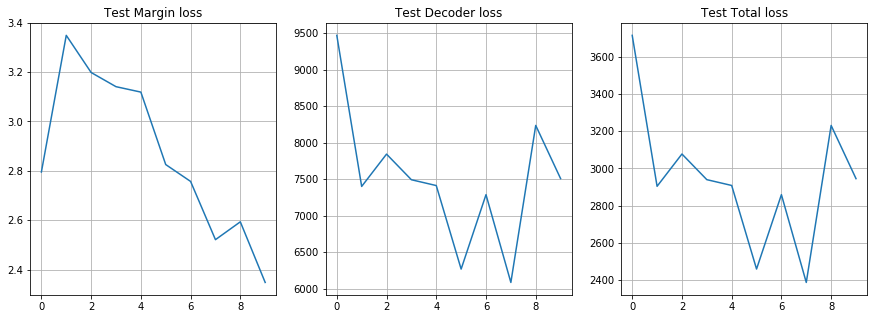

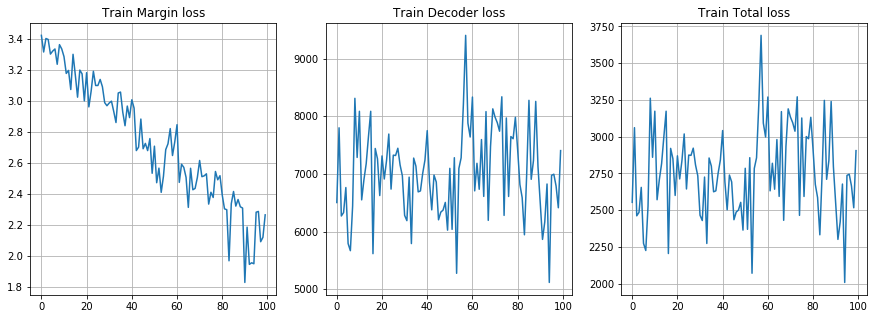

In [9]:
test_losses = np.array(test_losses)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(test_losses[:, 1])
ax1.set_title('Test Margin loss')
ax1.grid()
ax2.plot(test_losses[:, 2])
ax2.set_title('Test Decoder loss')
ax2.grid()
ax3.plot(test_losses[:, 3])
ax3.set_title('Test Total loss')
ax3.grid()
train_losses = np.array(train_losses)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(train_losses[:, 1])
ax1.set_title('Train Margin loss')
ax1.grid()
ax2.plot(train_losses[:, 2])
ax2.set_title('Train Decoder loss')
ax2.grid()
ax3.plot(train_losses[:, 3])
ax3.set_title('Train Total loss')
ax3.grid()

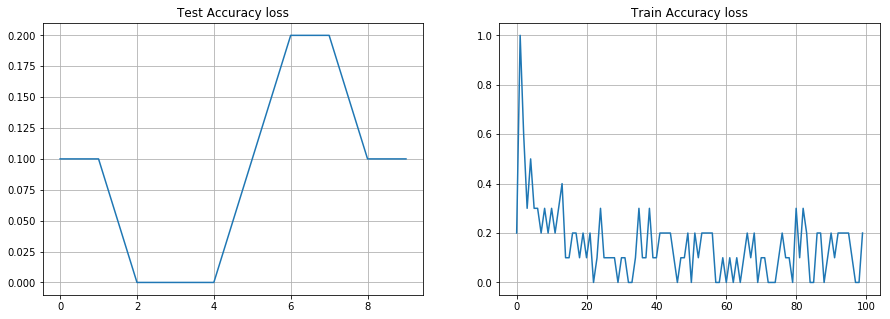

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(test_accuracy)
ax1.set_title('Test Accuracy loss')
ax1.grid()
ax2.plot(train_accuracy)
ax2.set_title('Train Accuracy loss')
ax2.grid()

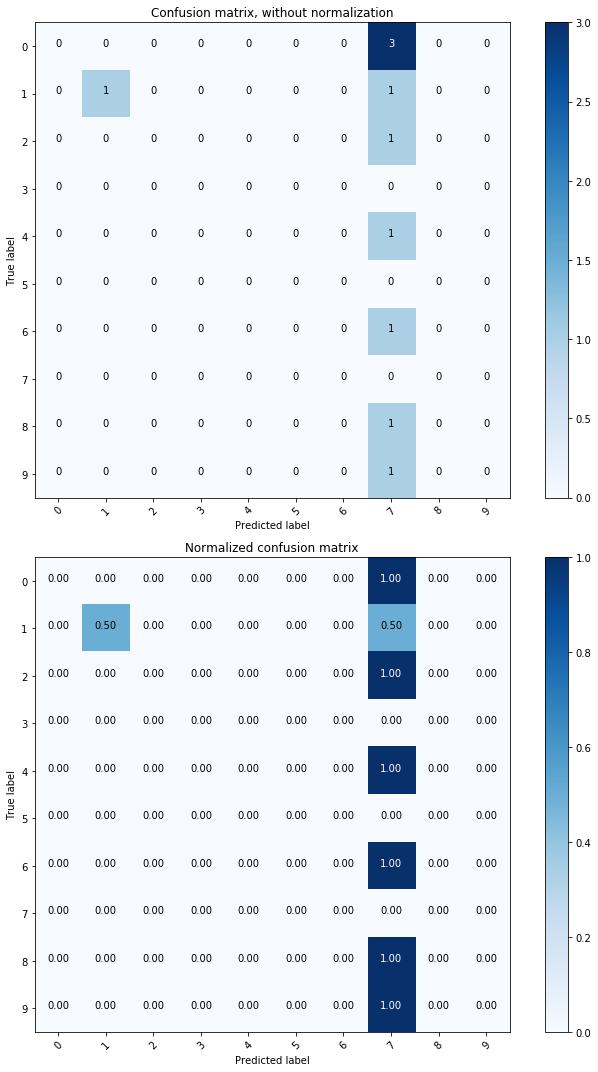

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        np.seterr(divide='ignore', invalid='ignore')
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.nan_to_num(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

mnist_x_batch_test, mnist_y_batch_test = next_batch(10, mnist_x_test, mnist_y_test)
mnist_x_batch_test = np.reshape(mnist_x_batch_test, (10, 28, 28, 1))
feed_dict_test = {
    caps_net.X: mnist_x_batch_test,
    caps_net.Y: mnist_y_batch_test
}

t_pred_label = sess.run(caps_net.pred_label, feed_dict=feed_dict_test)
cnf_matrix = confusion_matrix(mnist_y_batch_test, t_pred_label, labels=range(10))

plt.figure(figsize=(10, 15))
plt.subplot(211)
plot_confusion_matrix(cnf_matrix, classes=range(10),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(212)
plot_confusion_matrix(cnf_matrix, classes=range(10), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

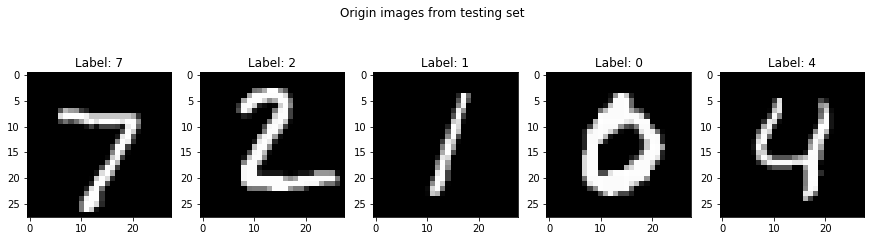

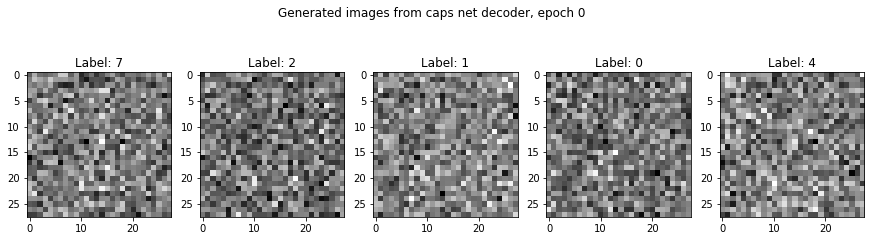

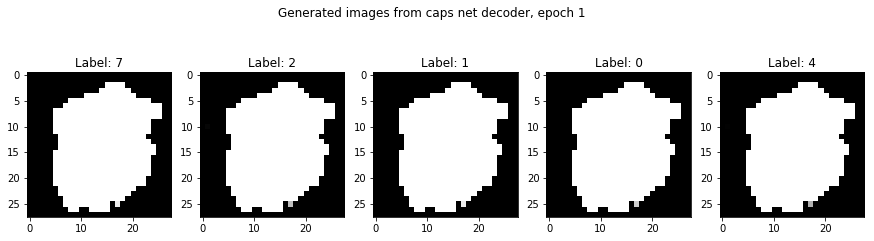

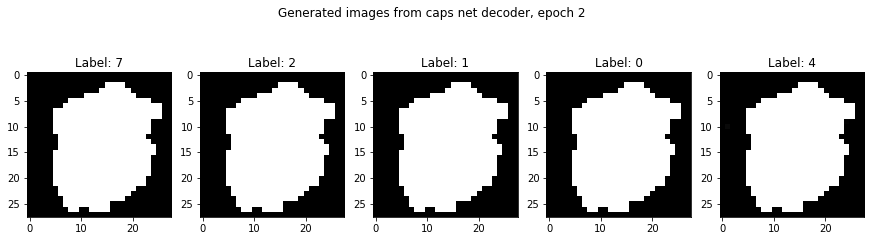

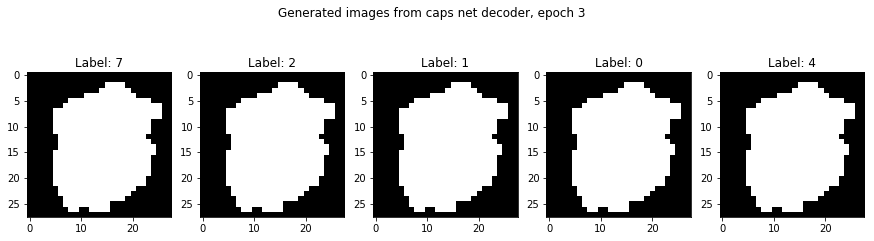

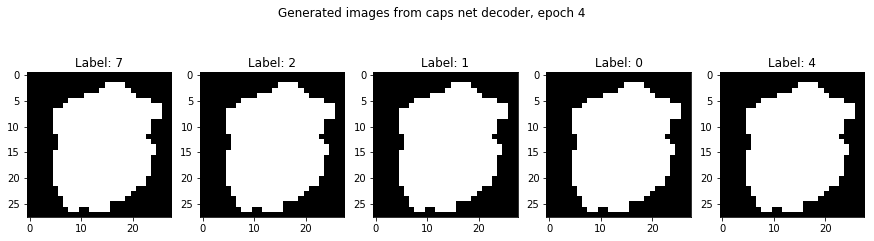

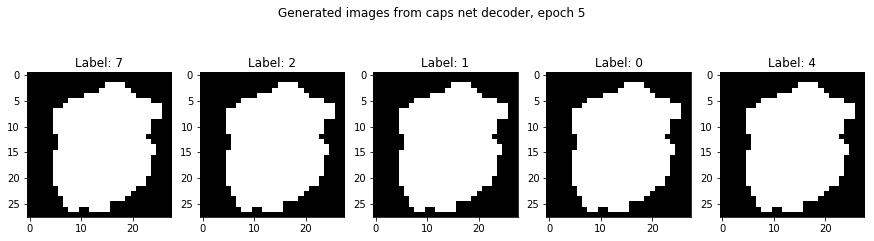

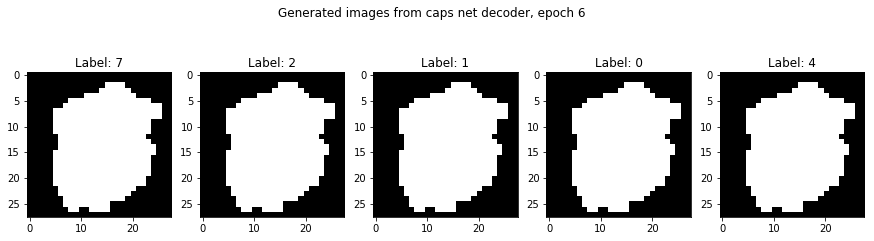

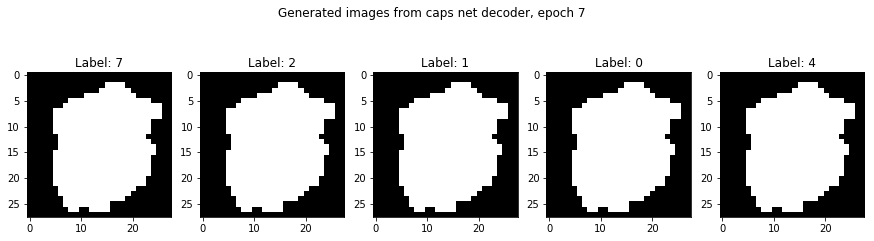

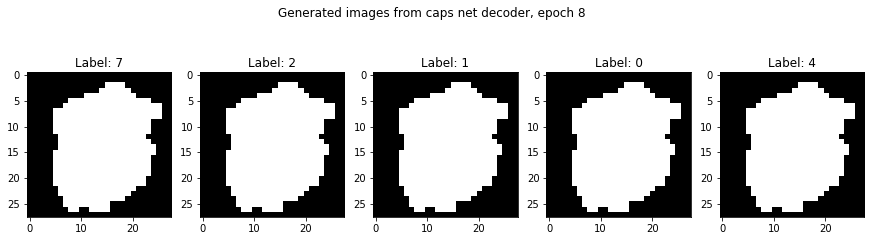

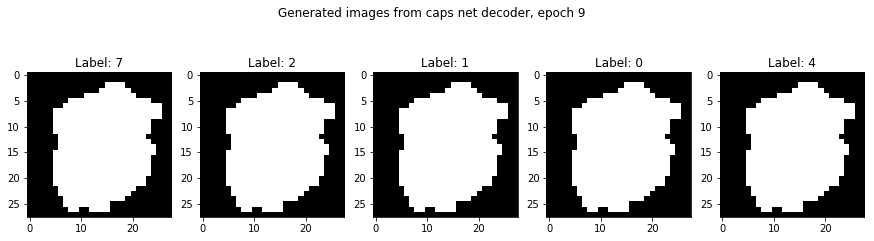

In [12]:
show_decoded_img(imgs_data, IMAGES_TO_SHOW)